In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Linear Regression-> Prediction of the continuous values that is nearly dependent on the input. Graph is always straight-line type.

In [74]:
X = np.random.randint(-7, 500, 200)
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)

X = (X-u)/std

In [75]:
X

array([-1.26562089, -0.38367805, -0.96944606, -0.81148614, -0.42316803,
        1.29464603, -1.27220256, -0.27178978, -1.12082431,  1.07086948,
       -0.04801323,  1.55791255,  0.34688655,  1.63031084,  0.33372322,
        0.88658292, -1.068171  , -0.91679275, -0.88388444, -0.96944606,
        1.05770616, -1.46965245, -0.31786142, -1.48281577, -1.04184435,
       -1.63419402,  0.76811298,  0.95239955, -0.19280982,  1.27490104,
        1.68296415, -1.00235437,  1.47893259,  1.4591876 , -1.40383582,
        0.95239955,  0.64306139,  1.39337097,  1.12352279, -1.26562089,
       -1.1405693 , -1.27220256, -0.17964649, -0.82464947,  0.6233164 ,
       -1.12740597, -0.21913647, -0.96286439, -0.61403625,  0.12969167,
        1.03796117, -1.04184435, -1.63419402,  0.39953985,  1.11694113,
        1.38020765,  1.41969763, -1.53546908,  0.76811298, -1.46307079,
        1.68296415,  0.30081491, -1.26562089, -0.59429126,  0.26790659,
        1.4065343 ,  0.91290957,  0.91290957,  0.04413005,  0.63

In [76]:
type(X)

numpy.ndarray

In [77]:
# x is numpy array, so we can perform mathematical operations in it

In [78]:
Y = []

for i in X:
    Y.append(7.18*i + 6.022)

In [79]:
# We have produce y in corresponding to x
Y

[np.float64(-3.0651580197572645),
 np.float64(3.267191623486052),
 np.float64(-0.9386226918024194),
 np.float64(0.1955294831068315),
 np.float64(2.983653579758739),
 np.float64(15.31755848189684),
 np.float64(-3.1124143603784837),
 np.float64(4.070549414046771),
 np.float64(-2.025518526090451),
 np.float64(13.710842900775402),
 np.float64(5.67726499516821),
 np.float64(17.207812106745592),
 np.float64(8.512645432441337),
 np.float64(17.727631853579),
 np.float64(8.418132751198899),
 np.float64(12.387665363381277),
 np.float64(-1.6474678011207002),
 np.float64(-0.5605719668326694),
 np.float64(-0.3242902637265752),
 np.float64(-0.9386226918024194),
 np.float64(13.616330219532966),
 np.float64(-4.530104579015045),
 np.float64(3.73975502969824),
 np.float64(-4.624617260257484),
 np.float64(-1.4584424386358252),
 np.float64(-5.711513094545516),
 np.float64(11.537051232199339),
 np.float64(12.860228769593466),
 np.float64(4.637625501501397),
 np.float64(15.175789460033185),
 np.float64(18.1

In [80]:
type(Y)
#type-mismatch
Y = np.array(Y)
type(Y)

numpy.ndarray

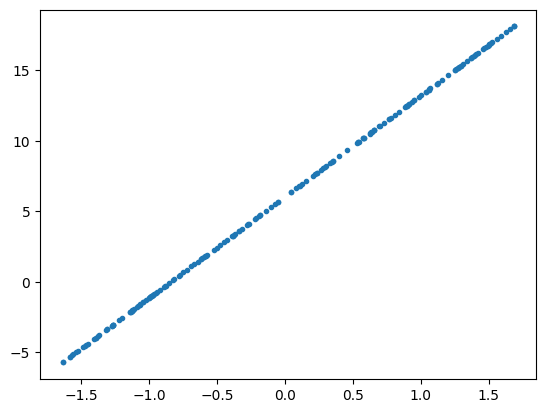

In [81]:
plt.scatter(X,Y, marker='.')

In [82]:
# y = summation to N (Wi*Xi)
# this is hypothesis function to get value y_pred, then we willminimise the difference between y_pred and y_true
def hypothesis(X, weight):
    y_pred = weight[0] + weight[1]*X
    # y = c + m*X
    return y_pred

In [83]:
# Now will find Loss as y_pred = 0 and y_true = 5 (assuming)

In [84]:
# We will determin L2_Loss ie -> 1/2(summation upto n(y_truei-y_predi)^2)

In [85]:
def loss_func(X, Y, weight):
    loss = 0

    for i in range(X.shape[0]): # For loop will run No of rows time.          X.shape->(200,),  X.shape[0]->200
        Y_pred = hypothesis(X[i], weight)
        loss += (Y_pred - Y[i]) **2
    return loss/X.shape[0]  # or return loss/2 

In [86]:
# Now using Gradient Descent -> Wj = Wj - learningRate*(Gradient), Gradient = summationUpToN(h(x)-Yt)*Xj, h(x) is hypothesis Func

In [87]:
def gradient(X, weight, Y):
    grad = np.zeros((2, )) # As 2 weights are given-> weight[0] and weight[1]

    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weight)
        grad[0] += (y_pred - Y[i]) * 1
        grad[1] += (y_pred - Y[i]) * X[i]

    return grad/X.shape[0]

In [88]:
def gradient_descent(X, Y):
    weights = np.zeros((2, ))  
    lr_rate = 0.003
    loss_epoch = []

    epochs = 5000

    for i in range(epochs):
        grad = gradient(X, weights, Y)

        loss_epoch.append(loss_func(X, Y, weights))
        
        weights[0] = weights[0] - lr_rate * grad[0]
        weights[1] = weights[1] - lr_rate * grad[1]
    
    return weights, loss_epoch


In [89]:
weights, loss_epoch = gradient_descent(X, Y)

In [100]:
# As we have not normalised the data, the value is increasing But after changing code, data is good now 

# Everything in Python is a class

In [92]:
#Making our own class right now
class MyClass:
    def __init__(self,value):
        self.value = value
    def __add__(self,other):
        return self.value+ ord(other.value)

In [93]:
a = MyClass(2)
b = MyClass('2')

In [94]:
a+b

52

In [95]:
print(type(a))

<class '__main__.MyClass'>


# Normalising the data

In [96]:
# Storing the data in finite range is normalisation. Eg-> (-7,500)->(-1,2)

In [97]:
 loss_epoch[-1]

np.float64(7.90261496319278e-12)

In [98]:
# ans is approaching to (-12) Power (v. close to zero)

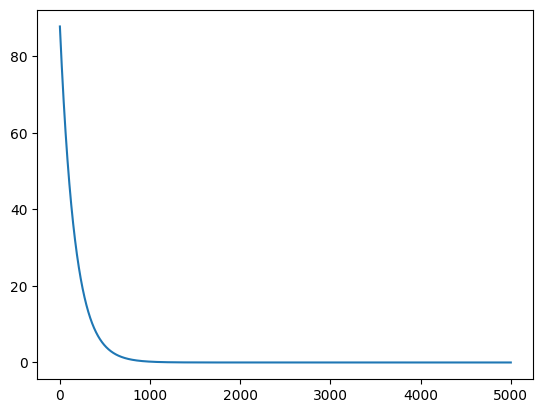

In [99]:
plt.plot(loss_epoch)

In [101]:
weights

array([6.0219982 , 7.17999785])

In [103]:
print(weights[0]+weights[1]*3) #y=3x+c

27.56199175667759


***But this is not optimised code***

**Eg-> Price = 3(Area) + Security**